In [2]:
import pathlib
import datetime
import json
from collections import defaultdict
import pathlib
import os
import random

from readability import Readability
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ollama
import numpy as np

In [3]:
# Load the dataset
dfs = pd.read_excel('./data/accumulative_metrics.xlsx', sheet_name=None)

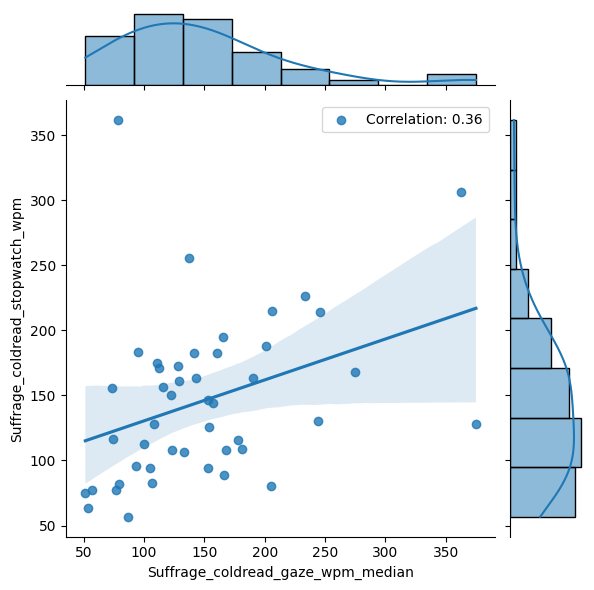

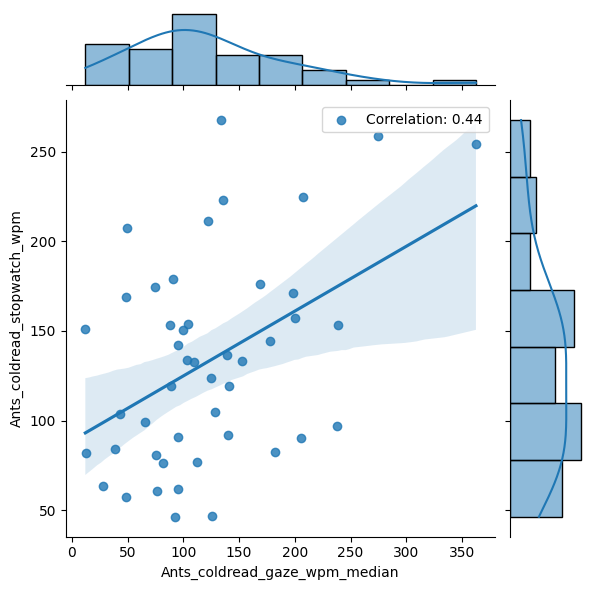

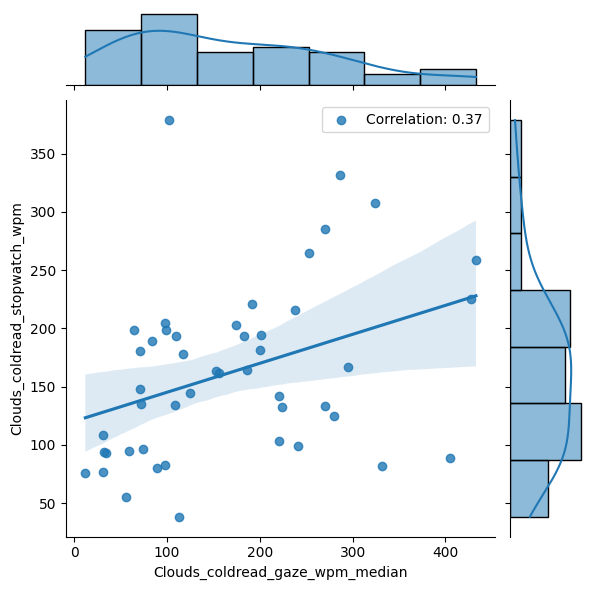

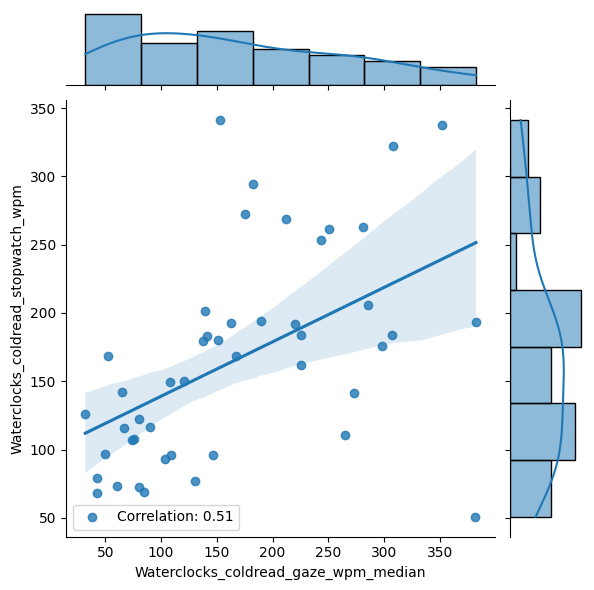

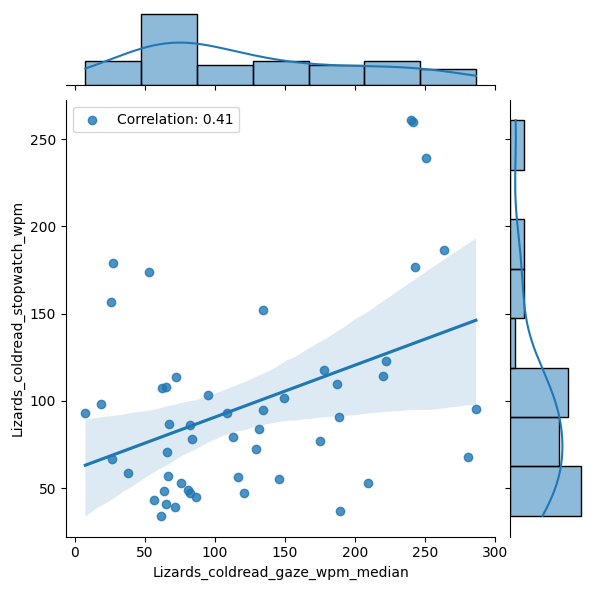

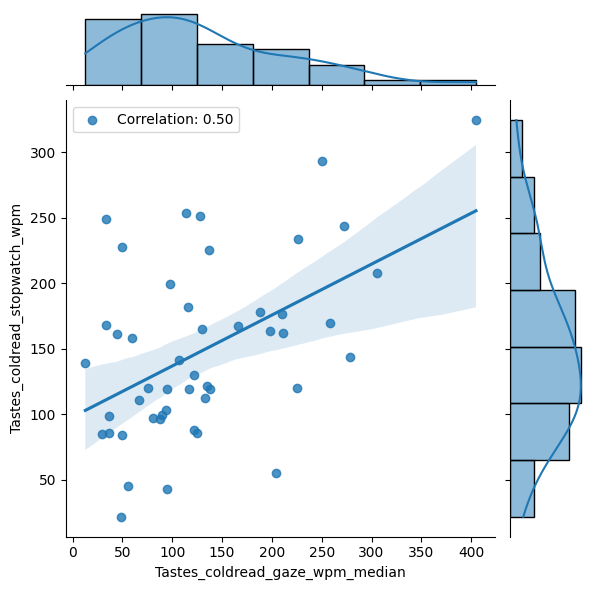

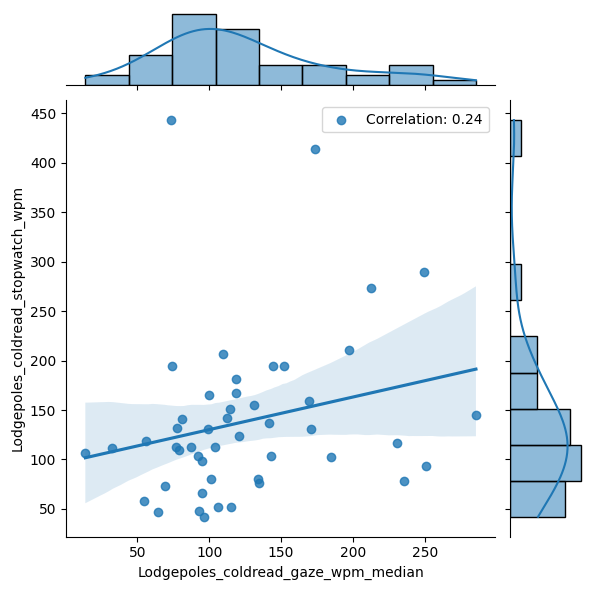

In [10]:
# Plot the correlation between "coldread_gaze_wpm_median", and "coldread_stopwatch_wpm"
assignment_names = ['Suffrage', 'Ants', 'Clouds', 'Waterclocks', 'Lizards', 'Tastes', 'Lodgepoles']

for assignment_name in assignment_names:
    df = dfs[assignment_name]

    # Remove outliers (>1000)
    df = df[df[f'{assignment_name}_coldread_gaze_wpm_median'] < 1000]
    df = df[df[f'{assignment_name}_coldread_stopwatch_wpm'] < 1000]

    # Plot the correlation between "coldread_gaze_wpm_median", and "coldread_stopwatch_wpm"
    sns.jointplot(data=df, x=f'{assignment_name}_coldread_gaze_wpm_median', y=f'{assignment_name}_coldread_stopwatch_wpm', kind='reg')

    # Add legend
    plt.legend(['Correlation: {:.2f}'.format(df[f'{assignment_name}_coldread_gaze_wpm_median'].corr(df[f'{assignment_name}_coldread_stopwatch_wpm']))])

    # Add the correlation coefficient to the plot
    # corr = df[f'{assignment_name}_coldread_gaze_wpm_median'].corr(df[f'{assignment_name}_coldread_stopwatch_wpm'])
    # sns.jointplot(data=df, x=f'{assignment_name}_coldread_gaze_wpm_median', y=f'{assignment_name}_coldread_stopwatch_wpm', kind='reg').annotate(plt.text(0, 0, f'Correlation: {corr:.2f}', fontsize=12))
